In [456]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [500]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from kneed import KneeLocator
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [460]:
df=pd.read_csv("Obesity.csv")

## Data Processing

In [504]:
df

,Gender,Age,Height,Weight,FamilyHistory,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [464]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         2111 non-null   object 
 1   Age            2111 non-null   float64
 2   Height         2111 non-null   float64
 3   Weight         2111 non-null   float64
 4   FamilyHistory  2111 non-null   object 
 5   FAVC           2111 non-null   object 
 6   FCVC           2111 non-null   float64
 7   NCP            2111 non-null   float64
 8   CAEC           2111 non-null   object 
 9   SMOKE          2111 non-null   object 
 10  CH2O           2111 non-null   float64
 11  SCC            2111 non-null   object 
 12  FAF            2111 non-null   float64
 13  TUE            2111 non-null   float64
 14  CALC           2111 non-null   object 
 15  MTRANS         2111 non-null   object 
 16  NObeyesdad     2111 non-null   object 
dtypes: float64(8), object(9)
memory usage: 280.5+ KB


In [466]:

num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(exclude='number').columns
df_work = df.copy()
my_label_enc = LabelEncoder()
df_work.NObeyesdad = my_label_enc.fit_transform(df_work.NObeyesdad)

In [502]:
labels_2_enc = [element for element in df[cat_col].columns if element != "NObeyesdad"]
my_ord_enc = OrdinalEncoder()
df_work[labels_2_enc] = my_ord_enc.fit_transform(df_work[labels_2_enc])
df_work.head()

,Gender,Age,Height,Weight,FamilyHistory,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0,1
1,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0,1
2,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0,1
3,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,5
4,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0,6


In [472]:
scaler = StandardScaler()
scaler.fit(df_work)
data_train_scaled = scaler.transform(df_work)

## Kmeans Classifier

Train the model and predict for k=1
SSE: 35887.0
Train the model and predict for k=2
SSE: 31708.11220876097
Train the model and predict for k=3
SSE: 29385.145094380354
Train the model and predict for k=4
SSE: 27973.64469774399
Train the model and predict for k=5
SSE: 26093.12408098834
Train the model and predict for k=6
SSE: 24723.004344614434
Train the model and predict for k=7
SSE: 23217.459208528257
Train the model and predict for k=8
SSE: 23497.80965231088
Train the model and predict for k=9
SSE: 21245.367086179354
Train the model and predict for k=10
SSE: 20947.028033934417


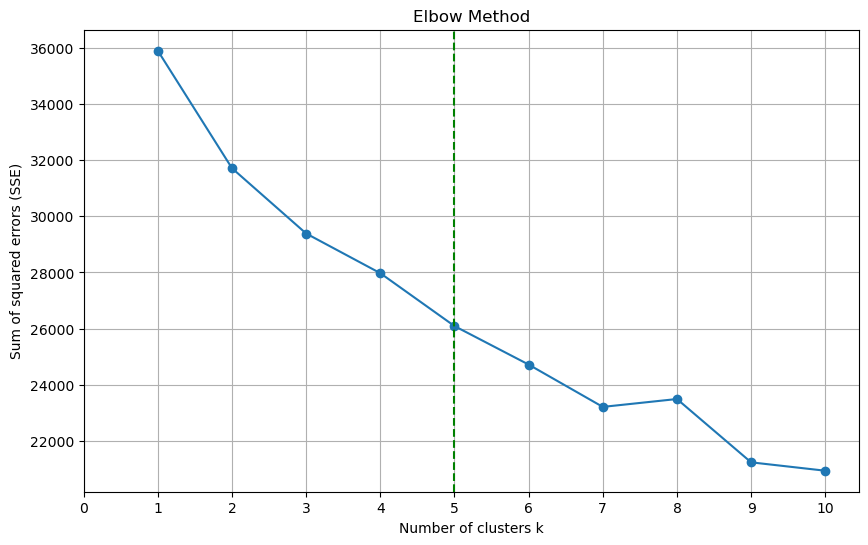

In [474]:
sse=[] 
k_values = range(1, 11)  

for k in k_values:
    print(f'Train the model and predict for k={k}')
    model = KMeans(n_clusters=k)
    model.fit(data_train_scaled)

    # Calculate sum of squared errors (SSE) for the current k
    print('SSE:', model.inertia_)
    sse.append(model.inertia_)

    
knee = KneeLocator(k_values, sse, curve="convex", direction="decreasing")
optimal_k = knee.knee



plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared errors (SSE)')
plt.axvline(x=optimal_k, color='green', linestyle='--')
plt.xticks(range(0, 11))
plt.grid(True)
plt.show()



In [476]:

for i in range(3,9):
    print('For # of clusters = {}'.format(i))
    km = KMeans(n_clusters=i, n_init=30, max_iter=300)
    y_means = km.fit_predict(data_train_scaled)
    labels = km.labels_
    silhouette = silhouette_score(data_train_scaled,labels,metric='euclidean')
    print('ss:',silhouette)
    dbs = davies_bouldin_score(data_train_scaled,labels)
    print('dbs:',dbs)
    chs = calinski_harabasz_score(data_train_scaled,labels)
    print('chs:',chs)
    print('\n')


print(f"The optimal value of k is: {optimal_k}")

model1 =KMeans(n_clusters=optimal_k, n_init=30, max_iter=300)
y_train_hat = model1.fit_predict(data_train_scaled)



For # of clusters = 3
ss: 0.14275232124320447
dbs: 2.3047607234310443
chs: 246.4855968182335


For # of clusters = 4
ss: 0.15340243958703137
dbs: 1.953778616732551
chs: 228.92099000903335


For # of clusters = 5
ss: 0.13371766809174127
dbs: 2.0571549640389586
chs: 220.89003314390314


For # of clusters = 6
ss: 0.14439485503583288
dbs: 1.8412786487769492
chs: 225.49476567523527


For # of clusters = 7
ss: 0.1389504840473728
dbs: 1.8620599372176676
chs: 216.97146290208764


For # of clusters = 8
ss: 0.14972483149826127
dbs: 1.8530344331723065
chs: 210.46321734333404


The optimal value of k is: 5


In [446]:
for i in range(0,optimal_k):
    display(df[y_train_hat==i].describe())
    


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,22.171869,1.782744,92.287946,2.202778,2.933168,2.173319,1.233237,0.751376
std,3.422717,0.062960,21.577271,0.467256,0.550897,0.518967,0.814230,0.650913
min,14.000000,1.605314,50.157707,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.459589,1.738583,77.500000,2.000000,2.993628,2.000000,0.748259,0.102041
50%,22.000000,1.782756,91.000000,2.000000,3.000000,2.027984,1.079934,0.682128
75%,24.181764,1.827125,112.213422,2.542817,3.000000,2.546184,1.949455,1.123776
max,33.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,23.289207,1.687034,117.028553,2.954634,3.005740,2.204927,0.668826,0.642145
std,2.845538,0.062900,19.127013,0.192884,0.124144,0.600749,0.711974,0.325017
min,18.000000,1.568543,54.500000,1.758394,2.106010,1.000000,0.000000,0.000000
25%,20.978166,1.631547,104.999403,3.000000,3.000000,1.678791,0.000000,0.434073
50%,24.361936,1.675185,111.922491,3.000000,3.000000,2.417122,0.264831,0.672513
75%,25.999942,1.741014,133.259033,3.000000,3.000000,2.691584,1.427413,0.881848
max,27.000000,1.843419,165.057269,3.000000,3.995957,3.000000,1.999897,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,20.648052,1.651581,53.933112,2.409407,2.763157,1.718261,1.101702,0.769017
std,3.887042,0.084862,9.874487,0.609588,0.903380,0.596246,0.924776,0.653334
min,16.000000,1.500000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,18.006742,1.584951,49.026214,2.000000,3.000000,1.000000,0.107078,0.000000
50%,20.000000,1.653209,51.154201,2.594653,3.000000,1.995177,1.000000,1.000000
75%,22.000000,1.710182,60.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.930000,93.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,20.467392,1.643994,61.900903,2.594475,2.631595,1.999287,1.282949,0.639880
std,5.020230,0.103436,13.503712,0.527710,0.841244,0.677426,0.946262,0.750190
min,16.093234,1.450000,42.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,18.000000,1.577454,53.310302,2.000000,2.425532,1.401487,0.543733,0.000000
50%,19.010211,1.610000,63.856193,2.984004,3.000000,2.000000,1.000000,0.057926
75%,21.000000,1.705000,67.188356,3.000000,3.000000,2.472250,2.000000,1.111364
max,55.000000,1.900000,115.000000,3.000000,4.000000,3.000000,3.000000,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,34.228167,1.701527,90.899318,2.337025,2.622101,1.933736,0.874197,0.407420
std,5.814038,0.086411,17.609656,0.453240,0.704315,0.580340,0.815672,0.532770
min,20.000000,1.500000,51.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30.188303,1.651812,78.000000,2.000000,2.400943,1.513199,0.000000,0.000000
50%,34.000000,1.709428,85.000000,2.222282,3.000000,2.000000,0.756277,0.020153
75%,38.297259,1.765690,109.000000,2.795086,3.000000,2.208068,1.454129,0.785701
max,55.246250,1.903832,123.721352,3.000000,3.999591,3.000000,3.000000,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,22.557041,1.638004,79.199679,2.275247,1.914727,1.908421,0.954568,0.666688
std,4.135246,0.064389,13.357356,0.499077,0.894613,0.646025,0.830792,0.652056
min,15.000000,1.481682,42.300000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.003476,1.605763,69.617317,2.000000,1.000000,1.289442,0.181555,0.000000
50%,21.882200,1.631890,80.000000,2.041626,1.646943,2.000000,0.981996,0.592078
75%,23.473008,1.679091,84.974435,2.762659,3.000000,2.230951,1.386677,1.054282
max,40.000000,1.850000,106.509947,3.000000,3.986652,3.000000,3.000000,2.000000


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,28.312669,1.737161,91.206810,2.471433,2.727273,1.873628,1.075671,0.731358
std,8.779344,0.126161,28.422529,0.514530,0.872410,0.696286,0.851883,0.767598
min,18.000000,1.480000,49.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,1.630000,66.750000,2.000000,3.000000,1.278603,0.637358,0.000000
50%,26.000000,1.750000,83.500000,2.497908,3.000000,2.000000,1.000000,0.722746
75%,31.195557,1.852500,125.067664,3.000000,3.000000,2.000000,1.614483,1.202370
max,56.000000,1.920000,130.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Random Forest Classifier 

In [496]:
data = df_work.drop('NObeyesdad', axis=1)  
target = df_work['NObeyesdad'] 
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=33)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
Test Accuracy with Best Model: 0.96%
Train Accuracy with Best Model: 1.00%


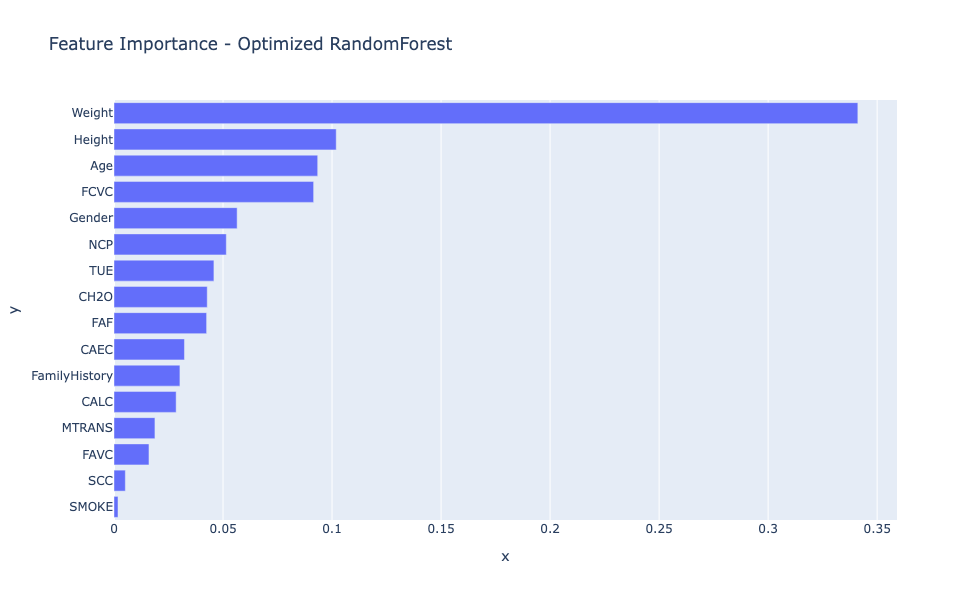

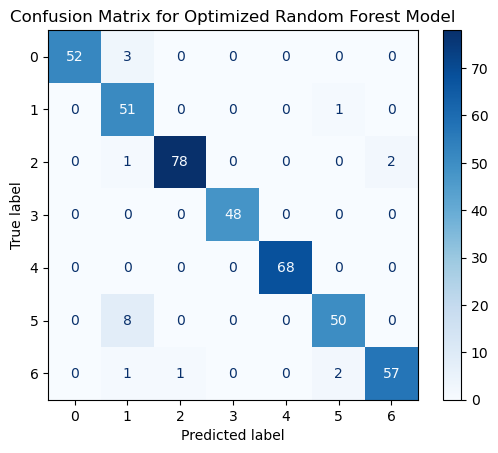

In [511]:

param_grid = {
    'n_estimators': [25, 50, 100],  # Number of trees
    'max_depth': [10, 15, 20, None],  # Maximum depth of each tree
    'max_features': [2, 4, 'sqrt'],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}


rf_model = RandomForestClassifier()


grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  
    scoring='accuracy',
    verbose=1,  
    n_jobs=-1  
)


grid_search.fit(data_train, target_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best Parameters:", best_params)


target_test_pred = best_model.predict(data_test)
test_accuracy = accuracy_score(target_test, target_test_pred)
print(f"Test Accuracy with Best Model: {test_accuracy:.2f}%")


target_train_pred = best_model.predict(data_train)
train_accuracy = accuracy_score(target_train, target_train_pred)
print(f"Train Accuracy with Best Model: {train_accuracy:.2f}%")


title_ = 'Feature Importance - Optimized RandomForest'
px.bar(
    x=best_model.feature_importances_,
    y=data.columns,
    title=title_,
    width=800,
    height=600
).update_yaxes(categoryorder="total ascending").show()


target_test_pred = best_model.predict(data_test)


cm = confusion_matrix(target_test, target_test_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Optimized Random Forest Model')
plt.show()